# Instacart EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

color = sns.color_palette()

#importing data sets
orders = pd.read_csv('../instacart_2017_05_01/orders.csv')
products = pd.read_csv('../instacart_2017_05_01/products.csv')
departments = pd.read_csv('../instacart_2017_05_01/departments.csv')
train = pd.read_csv('../instacart_2017_05_01/order_products__train.csv')
prior = pd.read_csv('../instacart_2017_05_01/order_products__prior.csv')
aisles = pd.read_csv ('../instacart_2017_05_01/aisles.csv')

In [39]:
#merge datasets into dataframe to see all data
order_products_prior_df = pd.DataFrame(prior)

products_df1 = pd.DataFrame(products)
orders_df2 = pd.DataFrame(orders)
dept_df3 = pd.DataFrame(departments)

orders_products_train_df3 = pd.DataFrame(train)
df4 = pd.merge(products_df1, orders_products_train_df3)
df5 = pd.merge(df4, orders_df2)
df7 = pd.merge(df5, dept_df3)
df6 = pd.merge(df7, aisles)
df6 = df6.sample(138462)

In [40]:
amt_of_orders = orders_df2.loc[:, 'user_id'].value_counts().sort_index()
amt_of_orders = pd.DataFrame(df6.user_id.value_counts().reset_index())
amt_of_orders.columns = ['user_id', 'order_count']
merged_df6 = pd.merge(df6, amt_of_orders)
df6

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
512573,34969,Red Vine Tomato,83,4,1097363,5,1,51378,train,36,6,18,28.0,produce,fresh vegetables
1122196,17862,Minced Garlic,81,15,1245866,3,0,70094,train,4,6,8,30.0,canned goods,canned jarred vegetables
1297363,20518,"Club Delight Sausage, Egg, & Cheese Sandwiches",106,12,2158774,3,1,143928,train,16,2,14,22.0,meat seafood,hot dogs bacon sausage
663321,24852,Banana,24,4,3349999,4,1,165579,train,13,4,18,30.0,produce,fresh fruits
60255,43192,Dark with 70% Cacao Content Organic Chocolate Bar,45,19,1302446,12,1,149675,train,5,1,13,9.0,snacks,candy chocolate
912270,37053,Just Mayo,72,13,1649127,17,0,51947,train,25,0,9,2.0,pantry,condiments
696312,13176,Bag of Organic Bananas,24,4,2911861,7,0,72452,train,19,5,17,12.0,produce,fresh fruits
102648,22760,Organic Coconut Granola MacroBar,3,19,961754,8,1,132260,train,8,2,11,7.0,snacks,energy granola bars
1132831,3576,Cheddar Broccoli Soup Mix,69,15,3027327,1,0,65741,train,7,6,7,16.0,canned goods,soup broth bouillon
121435,20754,Mediterranean Mint Gelato,37,1,1097792,27,1,191161,train,21,0,12,15.0,frozen,ice cream ice


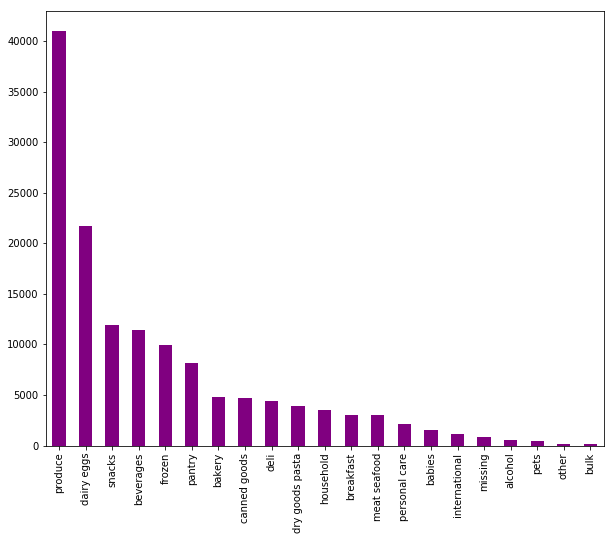

In [4]:
df6.loc[:, 'department'].value_counts().head(30).plot(kind='bar', color='purple', figsize=(10,8))

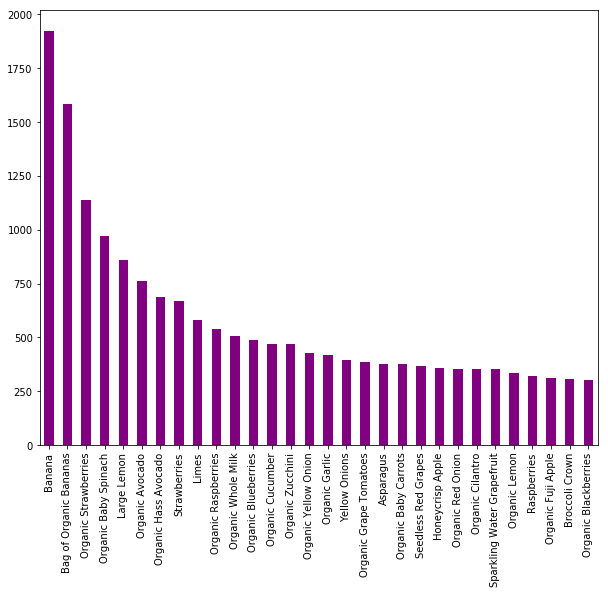

In [5]:
#list of all products and how many times they were ordered
df6.loc[:, 'product_name'].value_counts().head(30).plot(kind='bar', color='purple', figsize=(10,8))

In [6]:
#Product Frequency
product_freq = df6['product_name'].value_counts().reset_index().head(30)
product_freq.columns = ['product_name', 'order_count']
product_freq

,product_name,order_count
0,Banana,1923
1,Bag of Organic Bananas,1585
2,Organic Strawberries,1139
3,Organic Baby Spinach,969
4,Large Lemon,860
5,Organic Avocado,761
6,Organic Hass Avocado,689
7,Strawberries,669
8,Limes,579
9,Organic Raspberries,538


In [7]:
prod_list = df6["product_name"].tolist()

organic_list = [s for s in prod_list if "Organic" in s]
organic_df = pd.DataFrame({'product_name': organic_list})
organic_df

,product_name
0,Organic Grape Tomatoes
1,Organic Lemon
2,Organic Cucumber
3,Simply Stock Organic Vegetable Unsalted Stock
4,Bag of Organic Bananas
5,Organic Plain Whole Milk Yogurt
6,Organic Cripps Pink Apples
7,Organic Tomato Paste
8,Organic Ground Turkey
9,Organic Strawberries


In [8]:
organic_df = organic_df['product_name'].value_counts().sort_index().head(30)
organic_df.columns = ['product_name', 'order_count']
organic_df

0% Fat Free Organic Milk                                                                 16
0% Fat Organic Greek Vanilla Yogurt                                                       3
100% Grass-Fed Organic Plain Creamline Yogurt                                             3
100% Lactose Free Organic 2% Reduced Fat Milk                                             8
100% Organic Cannellini Beans                                                             1
100% Organic Cayenne Pepper                                                               1
100% Organic Diced Tomatoes                                                               4
100% Organic Einkorn Whole Wheat Pasta                                                    1
100% Organic Rainbow Heirloom Quinoa                                                      1
100% Organic Unbleached All-Purpose Flour                                                 4
100% Organic Unbleached White Whole Wheat Flour                                 

In [9]:
non_organic_list = [s for s in prod_list if "Organic" not in s]
non_organic_df = pd.DataFrame({'non_organic_name': non_organic_list})
non_organic_df

,non_organic_name
0,Traditional Favorites Four Cheese Pasta Sauce
1,Pink Virgin Lemonade
2,Pink Lemonade Drink Mix
3,Hot House Seedless Cucumbers
4,Orange & Lemon Flavor Variety Pack Sparkling F...
5,Whole Bay Leaves
6,Turkey Burger Patties
7,No Salt Added Black Beans
8,Condensed Chicken Noodle Soup
9,Sparkling Clementine Beverage


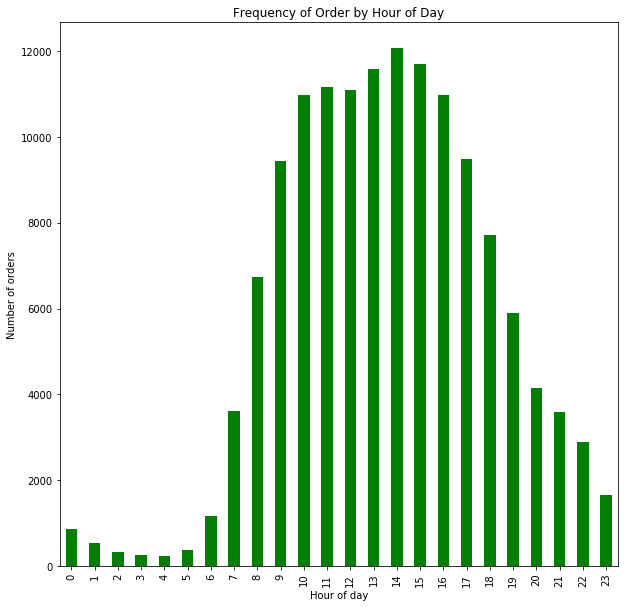

In [10]:
merged_df6.loc[:, 'order_hour_of_day'].value_counts().sort_index().plot(kind='bar', color='green', figsize=(10,10));
plt.xlabel('Hour of day');
plt.ylabel('Number of orders');
plt.title('Frequency of Order by Hour of Day');

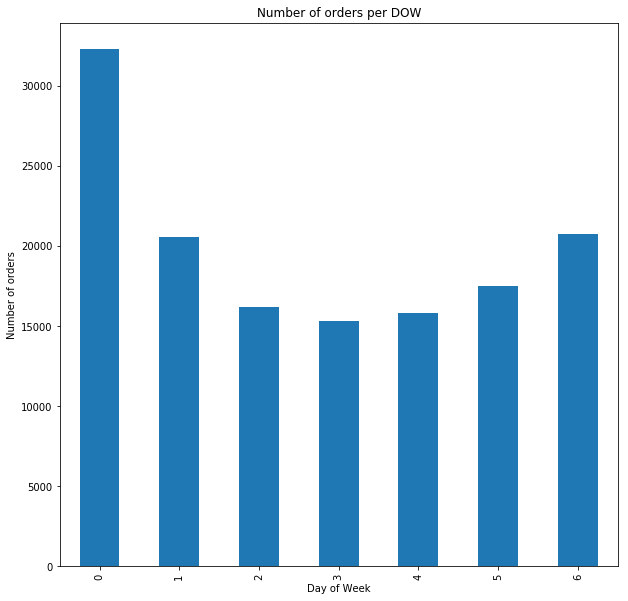

In [11]:
merged_df6.loc[:, 'order_dow'].value_counts().sort_index().plot(kind='bar', figsize=(10,10));
plt.xlabel('Day of Week');
plt.ylabel('Number of orders');
plt.title('Number of orders per DOW');

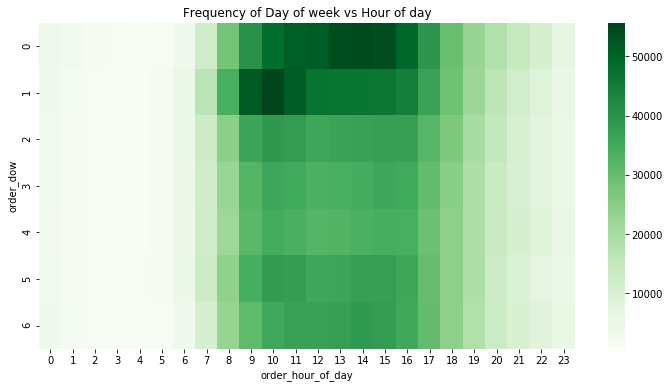

In [12]:
hour_dow_df = orders_df2.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
hour_dow_df = hour_dow_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(hour_dow_df, cmap="Greens")
plt.title("Frequency of Day of week vs Hour of day")
plt.show()

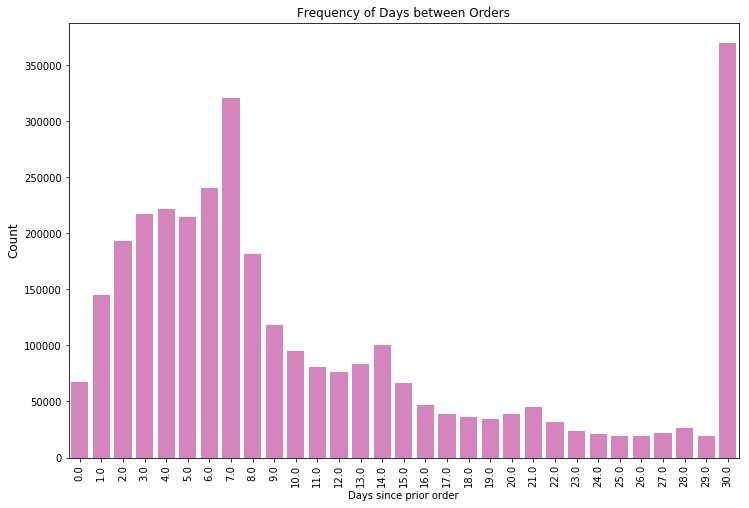

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df2, color=color[6])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=10)
plt.xticks(rotation='vertical')
plt.title("Frequency of Days between Orders", fontsize=12)
plt.show()

In [14]:
# percentage of re-orders in prior set
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5896974667922161

In [15]:
orders_products_train_df3.reordered.sum() / orders_products_train_df3.shape[0]

0.5985944127509629

In [16]:
merged_df6 = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
merged_df6["reordered"].loc[merged_df6["reordered"]>1] = 1
merged_df6.reordered.value_counts() / merged_df6.shape[0]

1    0.879151
0    0.120849
Name: reordered, dtype: float64

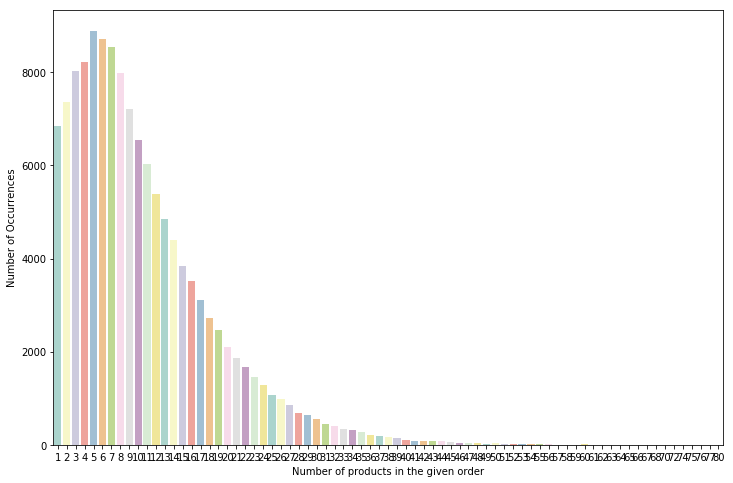

In [17]:
merged_df6 = orders_products_train_df3.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
prod_in_order = merged_df6.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(prod_in_order.index, prod_in_order.values, alpha=0.8, palette="Set3")
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Number of products in the given order', fontsize=10)
plt.show()

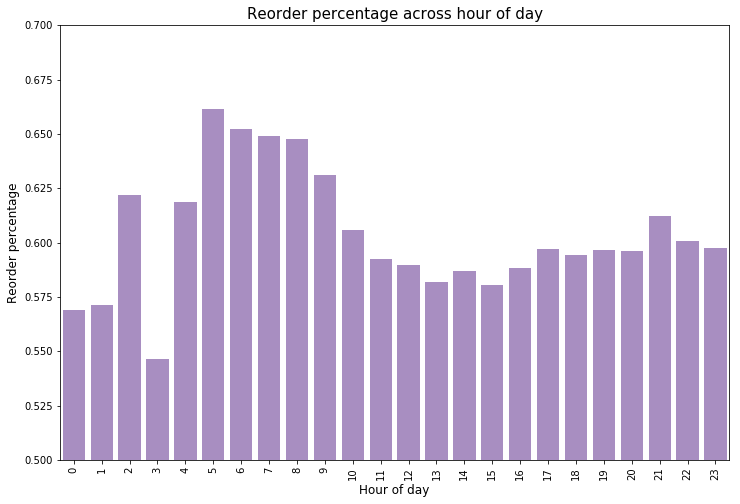

In [18]:
grouped_df = df6.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder percentage', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder percentage across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

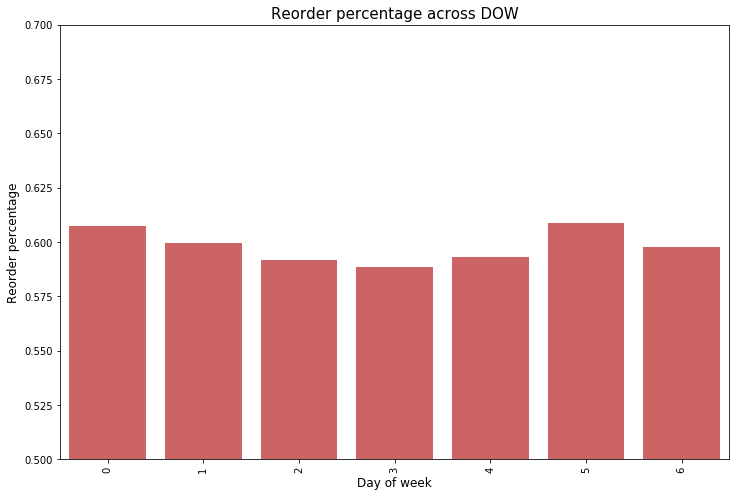

In [19]:
grouped_df = df6.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder percentage', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder percentage across DOW", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

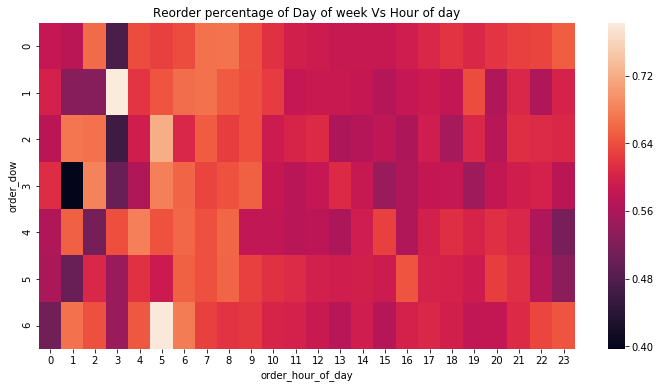

In [20]:
grouped_df = df6.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder percentage of Day of week Vs Hour of day")
plt.show()

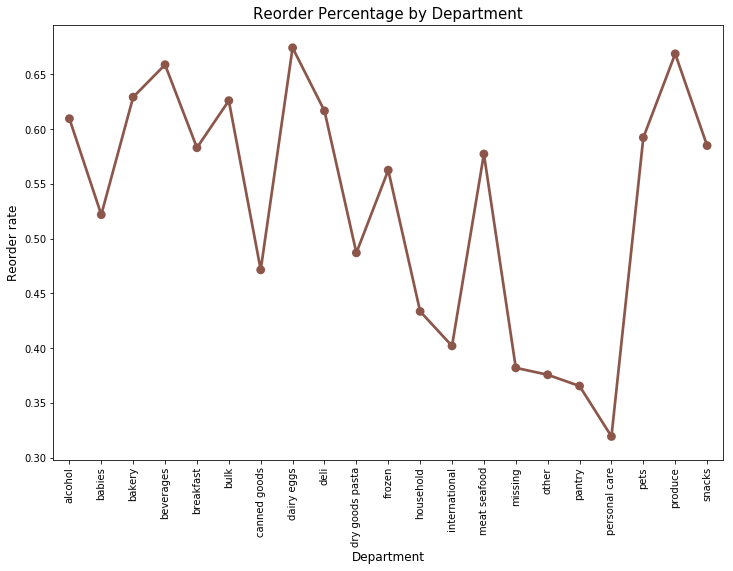

In [21]:
grouped_df = df6.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[5])
plt.ylabel('Reorder rate', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Reorder Percentage by Department", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


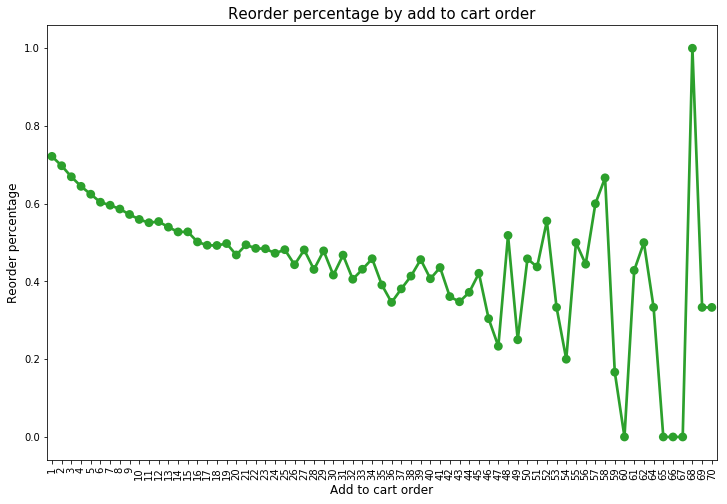

In [22]:
df6["add_to_cart_order_mod"] = df6["add_to_cart_order"].copy()
df6["add_to_cart_order_mod"].loc[df6["add_to_cart_order_mod"]>70] = 70
grouped_df = df6.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder percentage', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Reorder percentage by add to cart order", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Goal: Predict the Probability of a product being re-ordered.
Model: Logistic Regression Model to predict the probability of the product being re-ordered according to the products characteristics [aisle, department, organic/non-organic]


# Logistic Regression Model

In [41]:
df6.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
512573,34969,Red Vine Tomato,83,4,1097363,5,1,51378,train,36,6,18,28.0,produce,fresh vegetables
1122196,17862,Minced Garlic,81,15,1245866,3,0,70094,train,4,6,8,30.0,canned goods,canned jarred vegetables
1297363,20518,"Club Delight Sausage, Egg, & Cheese Sandwiches",106,12,2158774,3,1,143928,train,16,2,14,22.0,meat seafood,hot dogs bacon sausage
663321,24852,Banana,24,4,3349999,4,1,165579,train,13,4,18,30.0,produce,fresh fruits
60255,43192,Dark with 70% Cacao Content Organic Chocolate Bar,45,19,1302446,12,1,149675,train,5,1,13,9.0,snacks,candy chocolate


In [42]:
df6 = df6.drop('eval_set', axis=1)
df6 = df6.drop('days_since_prior_order', axis=1)
df6 = df6.drop('product_id', axis=1)
df6 = df6.drop('user_id', axis=1)
df6 = df6.drop('product_name', axis=1)
df6 = df6.drop('order_id', axis=1)

In [43]:
df6 = df6.drop('order_number', axis=1)
df6

,aisle_id,department_id,add_to_cart_order,reordered,order_dow,order_hour_of_day,department,aisle
512573,83,4,5,1,6,18,produce,fresh vegetables
1122196,81,15,3,0,6,8,canned goods,canned jarred vegetables
1297363,106,12,3,1,2,14,meat seafood,hot dogs bacon sausage
663321,24,4,4,1,4,18,produce,fresh fruits
60255,45,19,12,1,1,13,snacks,candy chocolate
912270,72,13,17,0,0,9,pantry,condiments
696312,24,4,7,0,5,17,produce,fresh fruits
102648,3,19,8,1,2,11,snacks,energy granola bars
1132831,69,15,1,0,6,7,canned goods,soup broth bouillon
121435,37,1,27,1,0,12,frozen,ice cream ice


In [44]:
df6['reordered'].value_counts()

1    82819
0    55643
Name: reordered, dtype: int64

In [45]:
features = ['aisle','add_to_cart_order','department','order_dow',
            'order_hour_of_day','reordered']

for feat in features:
    if feat != 'department':
        print(df6[feat].value_counts())

fresh vegetables                 15084
fresh fruits                     15060
packaged vegetables fruits        7831
yogurt                            5400
packaged cheese                   4078
water seltzer sparkling water     3654
milk                              3183
chips pretzels                    3152
soy lactosefree                   2622
bread                             2462
ice cream ice                     2301
refrigerated                      2289
frozen produce                    2212
eggs                              1984
crackers                          1973
energy granola bars               1732
frozen meals                      1721
lunch meat                        1709
soft drinks                       1681
fresh herbs                       1624
cereal                            1568
fresh dips tapenades              1545
soup broth bouillon               1514
juice nectars                     1418
packaged produce                  1332
baking ingredients       

In [46]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [47]:
df6_md1 = pd.get_dummies(df6[['aisle','department','add_to_cart_order',
                              'reordered']], drop_first = True)

In [48]:
df6

LogReg1 = LogisticRegression()

X1 = df6_md1.drop('reordered', axis =1)
y1 = df6_md1['reordered']

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1, random_state =42)

LogReg1.fit(x_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
name = df6_md1.columns.drop('reordered')

coef = LogReg1.coef_[0]

pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()

,Name,Coef
0,add_to_cart_order,-0.0357832
1,aisle_asian foods,-0.228314
2,aisle_baby accessories,0.463024
3,aisle_baby bath body care,-0.88457
4,aisle_baby food formula,0.309304
5,aisle_bakery desserts,-0.172608
6,aisle_baking ingredients,-0.331274
7,aisle_baking supplies decor,-0.663224
8,aisle_beauty,-0.211286
9,aisle_beers coolers,0.361431


In [50]:
y_pred = LogReg1.predict(x_test1)

In [51]:
metrics.accuracy_score(y_test1,y_pred)

0.62991102380402131

In [52]:
metrics.confusion_matrix(y_test1,y_pred)

array([[ 3902, 10115],
       [ 2696, 17903]])

Pretty bad accuracy score of 63%; 4059 True Negatives and 2787 False Negatives. 

In [53]:
metrics.roc_auc_score(y_test1,y_pred)

0.57374805879455715

The Area Under the ROC Curve is 0.5 which is completely wothless and our model gains no more insight that random guessing. If we go back to the Accuracy score, we can now conclude that its minuscule improvement above the baseline is caused by our train test split.

In [54]:
#Log Loss
metrics.log_loss(y_test1,y_pred)

12.782654042154123

# Model 2

In [55]:
df6_md2 = pd.get_dummies(df6[['aisle','department', 'add_to_cart_order', 'order_hour_of_day', 'order_dow',
                              'reordered']], drop_first = True)

df6

LogReg2 = LogisticRegression()

X1 = df6_md2.drop('reordered', axis =1)
y1 = df6_md2['reordered']

x_train2, x_test2, y_train2, y_test2 = train_test_split(X1,y1, random_state =42)

LogReg2.fit(x_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
y_pred2 = LogReg2.predict(x_test2)

In [57]:
metrics.accuracy_score(y_test2,y_pred2)

0.63057545643633006

In [58]:
metrics.confusion_matrix(y_test2,y_pred2)

array([[ 3924, 10093],
       [ 2695, 17904]])

In [59]:
metrics.roc_auc_score(y_test2,y_pred2)

0.57455709317872361

In [60]:
metrics.log_loss(y_test2,y_pred2)

12.759704843857776

In [61]:
y_pred_prob = LogReg2.predict_proba(x_test2)

y_pred_prob

array([[ 0.51061408,  0.48938592],
       [ 0.72894206,  0.27105794],
       [ 0.65851919,  0.34148081],
       ..., 
       [ 0.25203318,  0.74796682],
       [ 0.25046435,  0.74953565],
       [ 0.4399866 ,  0.5600134 ]])

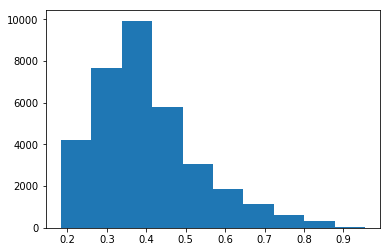

(array([   46.,   325.,   590.,  1163.,  1855.,  3046.,  5803.,  9928.,
         7639.,  4221.]),
 array([ 0.04480516,  0.12198842,  0.19917168,  0.27635495,  0.35353821,
         0.43072147,  0.50790473,  0.585088  ,  0.66227126,  0.73945452,
         0.81663778]),
 <a list of 10 Patch objects>)

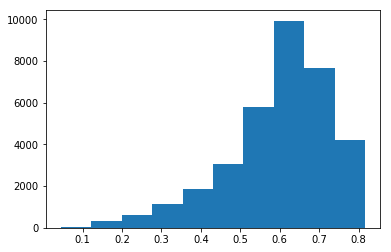

In [62]:
y_pred_prob_t = y_pred_prob.transpose()

import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y_pred_prob_t[0])
plt.show()
plt.hist(y_pred_prob_t[1])

In [63]:
y_pred3=[]
for prob in y_pred_prob_t[1]:
    if prob > .5:
        y_pred3.append(1)
    else:
        y_pred3.append(0)
        
print(len(y_pred3))
print(len(y_test2))

34616
34616


In [64]:
y_pred3.count(1)

27997

In [65]:
metrics.accuracy_score(y_test2,y_pred3)

0.63057545643633006

In [66]:
metrics.confusion_matrix(y_test2,y_pred3)

array([[ 3924, 10093],
       [ 2695, 17904]])

In [67]:
metrics.roc_auc_score(y_test2,y_pred3)

0.57455709317872361

In [68]:
metrics.log_loss(y_test2,y_pred3)

12.759704843857776

# Model Using All Features

In [69]:
df6_all = pd.get_dummies(df6, drop_first = True)

In [70]:
LogReg3 = LogisticRegression(penalty='l1',C=0.01)

# X and y features
X3 = df6_all.drop('reordered', axis =1)
y3 = df6_all['reordered']

# using train test split to cross val
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3,y3, random_state =42)

# fit model
LogReg3.fit(x_train3, y_train3)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
y_pred3 = LogReg3.predict(x_test3)

In [72]:
metrics.confusion_matrix(y_test3, y_pred3)

array([[ 3530, 10487],
       [ 2526, 18073]])

In [73]:
metrics.roc_auc_score(y_test3,y_pred3)

0.56460487149960004

In [78]:
X = df6_all.drop('reordered', axis =1)
y = df6_all['reordered']

# using train test split to cross val
x_train, x_test, y_train, y_test = train_test_split(X,y, random_state =42)

cees = [0.01, 0.1, 1.0, 10, 100]

for c in cees:
    logreg = LogisticRegression(penalty='l1', C=c)
    logreg.fit(x_train,y_train)
    y_pred = logreg.predict(x_test)
    roc = metrics.roc_auc_score(y_test, y_pred)
    print(roc," : ", c)

0.5646048715  :  0.01
0.573711329764  :  0.1
0.574405965601  :  1.0
0.574460001087  :  10
0.574411455041  :  100


In [79]:
cees = [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7 ,1.8, 1.9]

for c in cees:
    logreg = LogisticRegression(penalty='l1', C=c)
    logreg.fit(x_train,y_train)
    y_pred = logreg.predict(x_test)
    roc = metrics.roc_auc_score(y_test, y_pred)
    print(roc," : ", c)

0.57445303452  :  1.1
0.574404488474  :  1.2
0.574441636572  :  1.3
0.574333146532  :  1.4
0.574346021607  :  1.5
0.574357419555  :  1.6
0.574488705491  :  1.7
0.57434454448  :  1.8
0.574357419555  :  1.9
